In [1]:
%matplotlib inline
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import pyshtools as sht
import numpy as np
from scipy.special import erfi
plt.rcParams['figure.figsize'] = [12.0,8.0]

Loading SHTOOLS documentation


In [2]:
# These are in the "geodesy" normalization convention: the SHTools default (norm=1)
max_degree = 2190
#max_degree = 2159
coeffs,errors,lmax = sht.SHReadError('EGM2008_to2190_ZeroTide.shm',max_degree)

In [3]:
# These are appropriate values for the GRS80 model
omega_earth = 7.292115e-5
a_earth = 6378137.
b_earth = 6356752.3141
GM_earth = 3.986005e14
f_earth = 0.003352810681183637418
pot_ref_geoid_earth = 6263686.0850E1

print a_earth - sht.constant.r0_pot_earth


0.700000000186


In [4]:
geoid = sht.MakeGeoidGridDH(coeffs,
                            r0pot = a_earth,
                            GM = GM_earth,
                            PotRef=pot_ref_geoid_earth,
                            omega=omega_earth,
                            a = a_earth,
                            f = f_earth,
                            order=2)

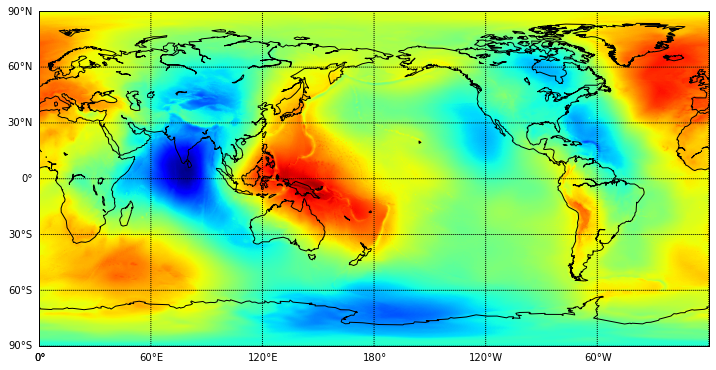

In [22]:
def DrawMap(img):
    m = Basemap(projection='cyl',lon_0=180,resolution='c')
    m.drawcoastlines()
    #m.fillcontinents(color='coral',lake_color='aqua')
    # draw parallels and meridians.
    m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1])
    m.drawmapboundary()
    #plt.title("Mollweide Projection")
    m.imshow(img,origin='upper')
    
DrawMap(geoid)

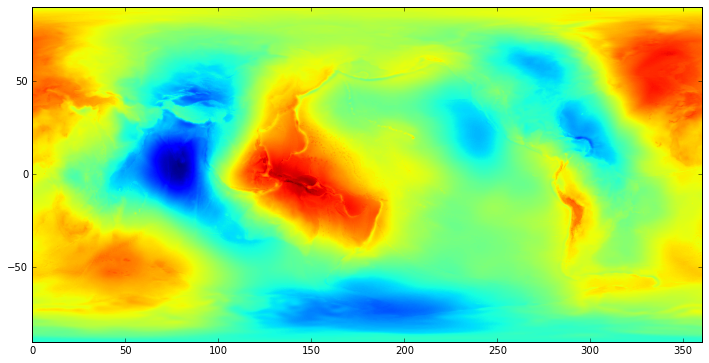

In [74]:
plt.imshow(geoid,extent=(0., 360., -90., 90.))

4382 8764


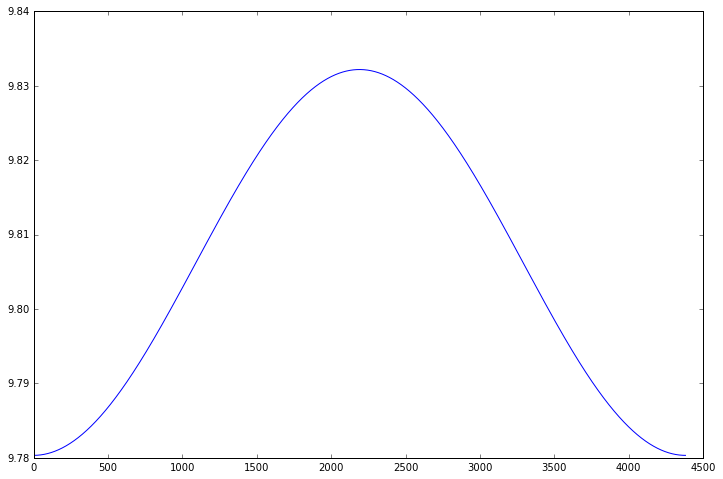

In [18]:
nlat,nlon = geoid.shape
print nlat, nlon
dlat = 180. / nlat
lats = np.linspace(0. + (dlat / 2.), 180. - (dlat / 2.), nlat)
#plt.plot(lats)
normal_gravs = [sht.NormalGravity(lat,GM_earth,omega_earth,a_earth,b_earth) for lat in lats]
ng = np.array(normal_gravs,np.float64)
plt.plot(ng)
#print normal_gravs

-1046.80278545 863.028452941


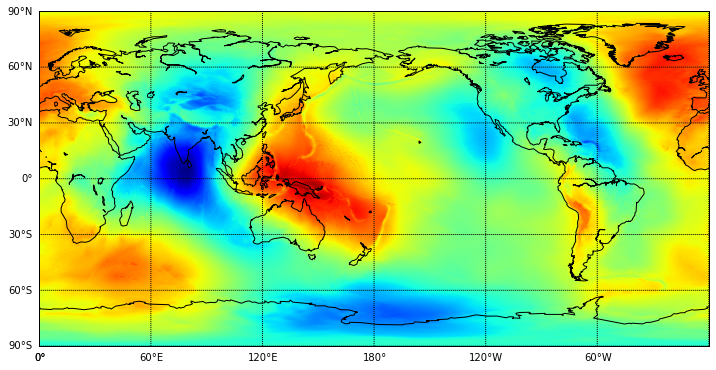

In [23]:
# Brun's formula
T = geoid * ng[:,np.newaxis]
fig = plt.figure()
DrawMap(T)
#fig.savefig('Timage.png')
print T.min(),T.max()

In [20]:
# In order to exactly match the Driscoll-Healy convolution theorem details, 
# we'll use the ortho-normalized (norm=4) version
# DON'T FORGET TO CALL WITH SAMPLING=2  !!!!!!!!
T_SH = sht.SHExpandDH(T, lmax_calc=max_degree,norm=4,sampling=2)

-1046.80278108 863.029327089


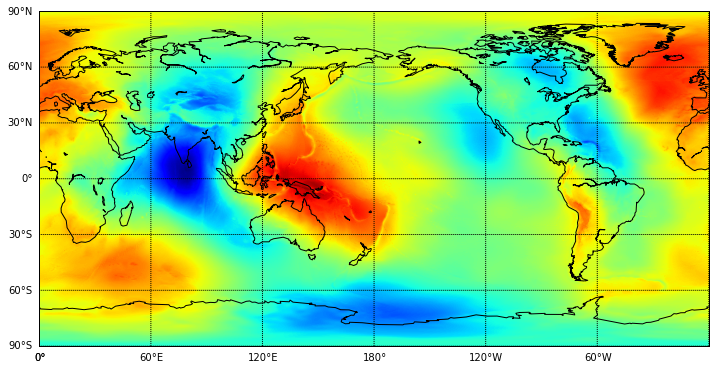

In [24]:
# Sanity check: Do we reproduce T as a grid from the T_SH coefficients?
T_test = sht.MakeGridDH(T_SH,sampling=2,csphase=1,norm=4)
DrawMap(T_test)
print T_test.min(),T_test.max()

-0.00493284119167 0.00373991565952


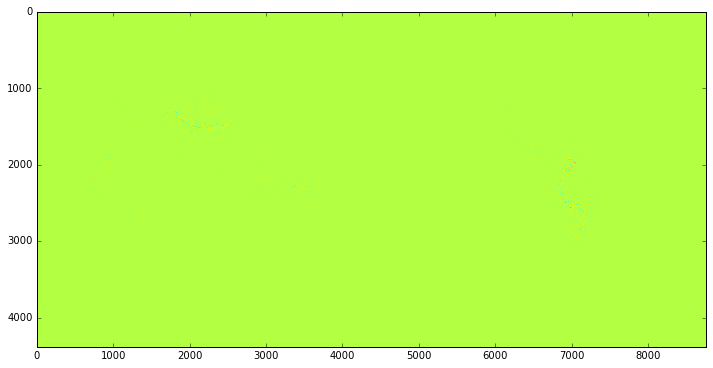

In [10]:
T_err = T-T_test
plt.imshow(T_err)
print T_err.min(),T_err.max()

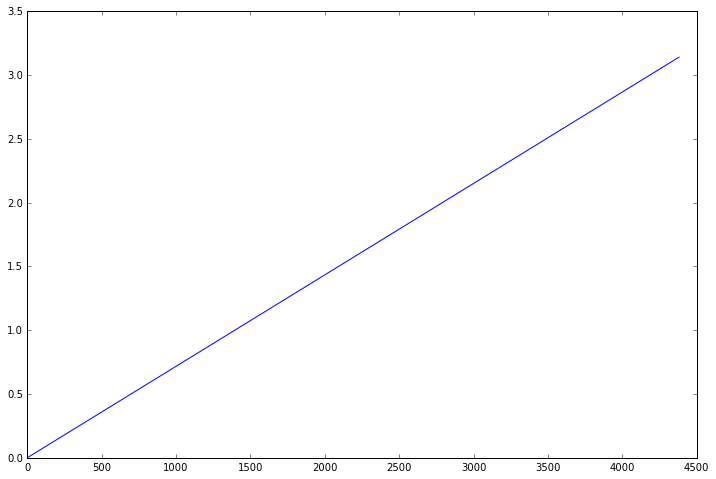

In [11]:
co_lats = np.linspace(0.,np.pi,num=T.shape[0],endpoint=True,dtype=np.double)
plt.plot(co_lats)

In [37]:
r_inner = 6371000. - 700000.
# r_inner = 0.5290 *6371000.
#rpm_2D = -make_Rpm(R_e = 6371000., r_i = r_inner, co_lats = co_lats, shp = T.shape)
print 6371000. - r_inner

700000.0


According to Arfken and Weber (4th International edition, 1995; eqn. 12.3) the Legendre polynomial $P_n(\cos \theta)$ coefficient of 1/r is $\left( \frac{a}{r} \right)^n$, where $a$ is the radius of the inner sphere, and $r$ is the radius of the outer sphere. Let's plot those coefficients and see what the look like relative to the stuff we've been evaluating numerically. In our notation, $r$ is $R_e$, while $a$ is $r_i$, so the expression becomes $\left( \frac{r_i}{R_e} \right)^n$.

In [38]:
P_degrees = np.arange(0,max_degree+1,1.)
print len(P_degrees)
P_coeffs = (r_inner/6371000.)**(-P_degrees) #Backprojection is the inverse of the 1/r operator
print(len(P_coeffs))

2191
2191


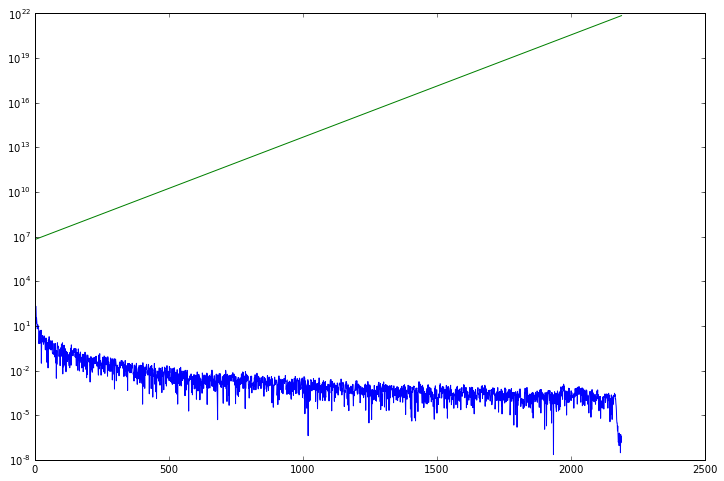

In [27]:
plt.semilogy(np.abs(T_SH[0,:,0]))
plt.semilogy(6371000.*P_coeffs)
#plt.semilogy(np.abs(1./kernel))
#plt.semilogy(np.abs(1./(kernel**2)))


In [39]:
sh_degree = np.arange(T_SH.shape[1])
factor = 2.*np.pi*((1+(2*sh_degree))/(4.*np.pi))**2
#BP_SH = (factor*P_coeffs)[np.newaxis,:,np.newaxis] * T_SH
FBP_SH = (factor**2)*((1./P_coeffs))[np.newaxis,:,np.newaxis] * T_SH

print  FBP_SH.shape

(2, 2191, 2191)


In [40]:
#BP_r1 = sht.MakeGridDH(BP_SH,sampling=2,csphase=1,norm=4)
FBP_r1 = sht.MakeGridDH(FBP_SH,sampling=2,csphase=1,norm=4)

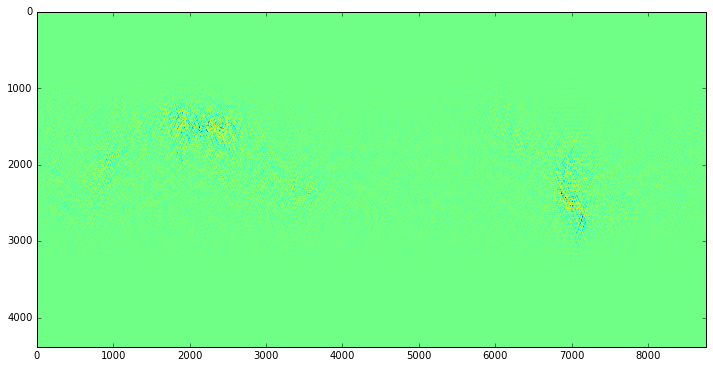

In [39]:
plt.imshow(BP_r1)

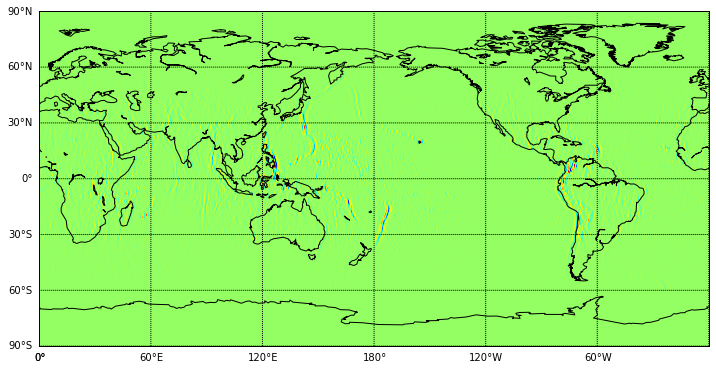

In [31]:
DrawMap(FBP_r1)

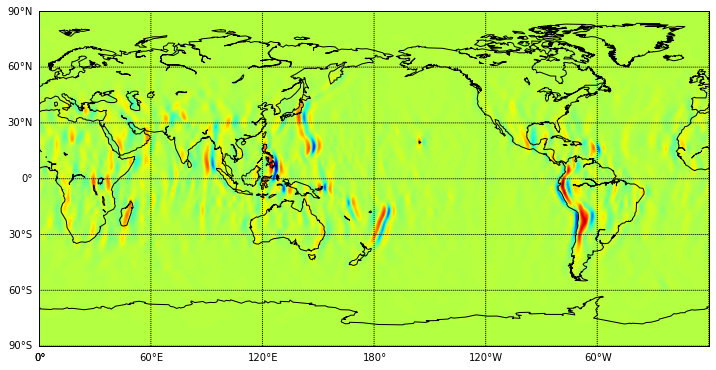

In [36]:
DrawMap(FBP_r1)

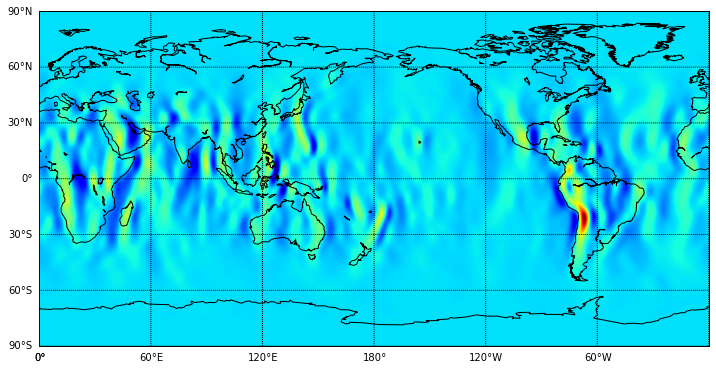

In [41]:
DrawMap(FBP_r1)

In [56]:
filtered_convolved = convolved.copy()
filtered_convolved[0,:,:] *= K_filter_clipped[ :, np.newaxis]
filtered_convolved[1,:,:] *= K_filter_clipped[ :, np.newaxis]

In [26]:
tomo_d50_filtered = sht.MakeGridDH(filtered_convolved,sampling=2,csphase=1,norm=4)

In [57]:
tomo_d100_filtered = sht.MakeGridDH(filtered_convolved,sampling=2,csphase=1,norm=4)

In [52]:
tomo_d660_filtered = sht.MakeGridDH(filtered_convolved,sampling=2,csphase=1,norm=4)

In [116]:
tomo_d2880_filtered = sht.MakeGridDH(filtered_convolved,sampling=2,csphase=1,norm=4)

In [22]:
tomo_d3000_filtered = sht.MakeGridDH(filtered_convolved,sampling=2,csphase=1,norm=4)

In [ ]:
plt.hist(tomo_d100_filtered.flat,bins=100,log=True)

-1.08866577277 1.02811638317


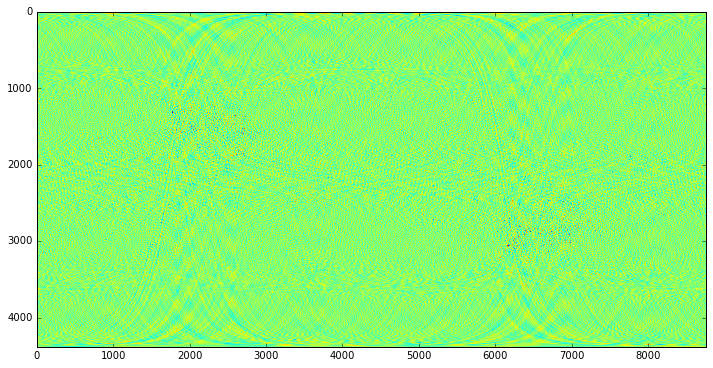

In [28]:
plt.imshow(tomo_d50_filtered)
print tomo_d50_filtered.min(),tomo_d50_filtered.max()

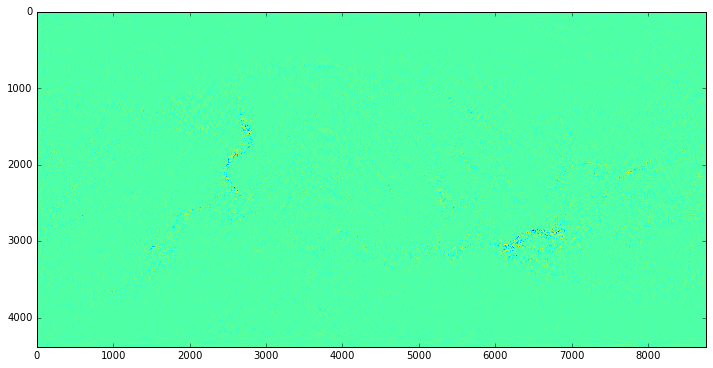

In [58]:
plt.imshow(tomo_d100_filtered)

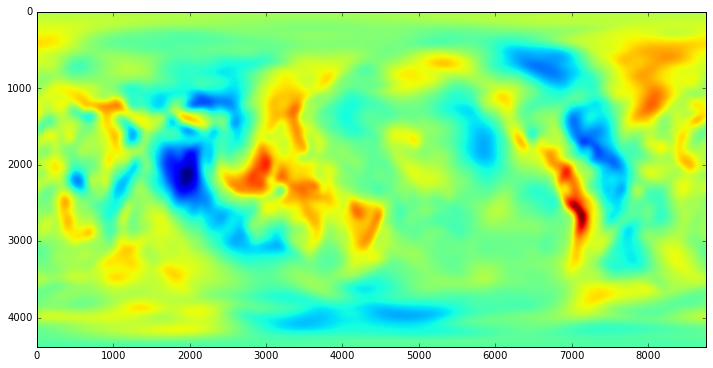

In [53]:
plt.imshow(tomo_d660_filtered)

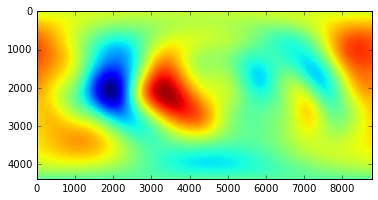

In [117]:
plt.imshow(tomo_d2880_filtered)

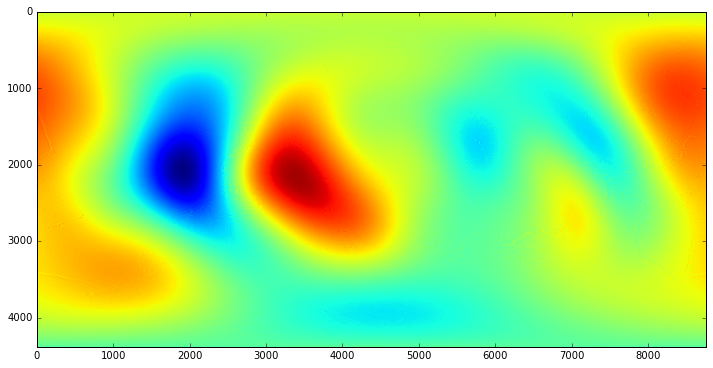

In [27]:
plt.imshow(tomo_d3000_filtered)

In [1]:
%matplotlib inline
%run GravTomo.py

Loading SHTOOLS documentation




**Old dead code only below here. Mostly preserved for examples of calling routines...**

In [35]:
#d_dr_op = -(2. + np.arange(0,kernel.shape[0]))/(r_inner)
d_dr_op = -(1. + np.arange(1.,kernel.shape[0]+1))/(r_inner)

-0.0429923661583


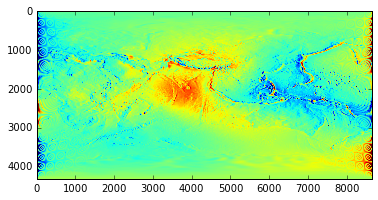

In [36]:
grav_disturbance_SH = d_dr_op * T_SH
grav_disturbance = sht.MakeGridDH(grav_disturbance_SH,sampling=2,csphase=1)
plt.imshow(grav_disturbance,vmin=-0.001,vmax=0.001)
print grav_disturbance.min()

In [23]:
d_dr_convolved = d_dr_op[np.newaxis,:,np.newaxis] * convolved * cone_filter_2d

In [24]:
d_dr_2D = sht.MakeGridDH(d_dr_convolved,sampling=2,csphase=1)

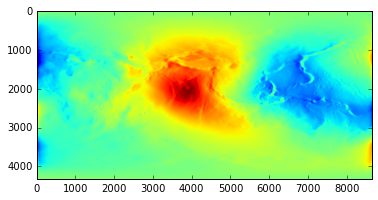

In [25]:
plt.imshow(d_dr_2D)